<a href="https://www.kaggle.com/code/malkaggle/crime-category-prediction-iitm-mlp-project?scriptVersionId=206013754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Crime Category Prediction

## Objective:
To predict the crime-category of any new data point with the specified attributes as accurately as possible, thus aiding in categorizing the data for further analysis. 

## Approach:
This is a multi-class classification problem, for which we need to train and test different types of models and choose the one that fits the performance criteria. Since training data is available, this is a case of supervised learning.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# Metadata
- **Location**: Street address of the crime incident.
- **Cross_Street**: Cross street of the rounded address.
- **Latitude**: Latitude coordinates of the crime incident.
- **Longitude**: Longitude coordinates of the crime incident.
- **Date_Reported**: Date the incident was reported.
- **Date_Occurred**: Date the incident occurred.
- **Time_Occurred**: Time the incident occurred in 24-hour military time.
- **Area_ID**: LAPD's Geographic Area number.
- **Area_Name**: Name designation of the LAPD Geographic Area.
- **Reporting_District_no**: Reporting district number.
- **Part 1-2**: Crime classification.
- **Modus_Operandi**: Activities associated with the suspect.
- **Victim_Age**: Age of the victim.
- **Victim_Sex**: Gender of the victim.
- **Victim_Descent**: Descent code of the victim.
- **Premise_Code**: Premise code indicating the location of the crime.
- **Premise_Description**: Description of the premise code.
- **Weapon_Used_Code**: Weapon code indicating the type of weapon used.
- **Weapon_Description**: Description of the weapon code.
- **Status**: Status of the case.
- **Status_Description**: Description of the status code.
- **Crime_Category**: The category of the crime *(Target Variable)*

# Loading the Datasets

In [2]:
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

# Store the target variable of train data, just in case
target_var_train = train['Crime_Category']

# Exploratory Data Analysis

In [3]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

### Importing Libraries for Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
unique_counts = train.nunique()
missing_values = train.isna().sum()

# Combine the results into a single DataFrame
summary_df = pd.DataFrame({
    'Unique_Counts': unique_counts,
    'Missing_Values': missing_values
})

print(summary_df)

                       Unique_Counts  Missing_Values
Location                       12399               0
Cross_Street                    1495           16552
Latitude                        3622               0
Longitude                       3578               0
Date_Reported                    811               0
Date_Occurred                    366               0
Time_Occurred                    996               0
Area_ID                           21               0
Area_Name                         21               0
Reporting_District_no           1120               0
Part 1-2                           2               0
Modus_Operandi                 10489            2741
Victim_Age                       100               0
Victim_Sex                         4            2624
Victim_Descent                    17            2624
Premise_Code                     217               0
Premise_Description              216               5
Weapon_Used_Code                  57          

Since `Cross_Street` column has too many null values, we can drop it.

In [7]:
# Summary of categorical features
train.describe(exclude=np.number).transpose()

,count,unique,top,freq
Location,20000,12399,6TH,33
Cross_Street,3448,1495,BROADWAY,56
Date_Reported,20000,811,07/13/2020 12:00:00 AM,87
Date_Occurred,20000,366,01/01/2020 12:00:00 AM,137
Area_Name,20000,21,77th Street,1345
Modus_Operandi,17259,10489,0344,826
Victim_Sex,17376,4,M,8538
Victim_Descent,17376,17,H,6143
Premise_Description,19995,216,STREET,5033
Weapon_Description,7335,57,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3990


In [8]:
# Summary of numerical features
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


Some values of 'Victim_Age' are negative. Let's assume that the age is unknown in these cases, and we'll replace these with 0.

In [9]:
train['Victim_Age'] = train['Victim_Age'].apply(lambda x: 0 if x <= 0 else x)
test['Victim_Age'] = test['Victim_Age'].apply(lambda x: 0 if x <= 0 else x)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Victim_Age', ylabel='Count'>

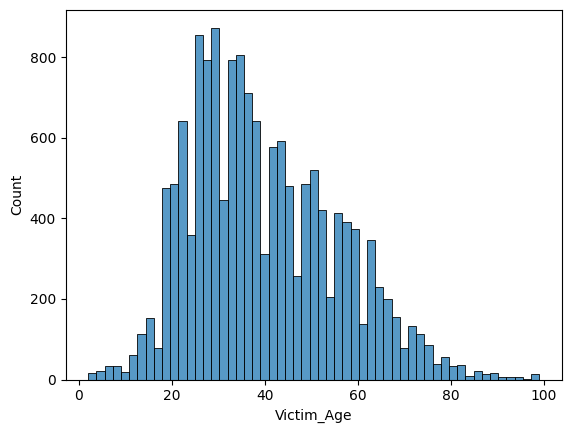

In [10]:
sns.histplot(train[(train['Victim_Age'])>0].Victim_Age)

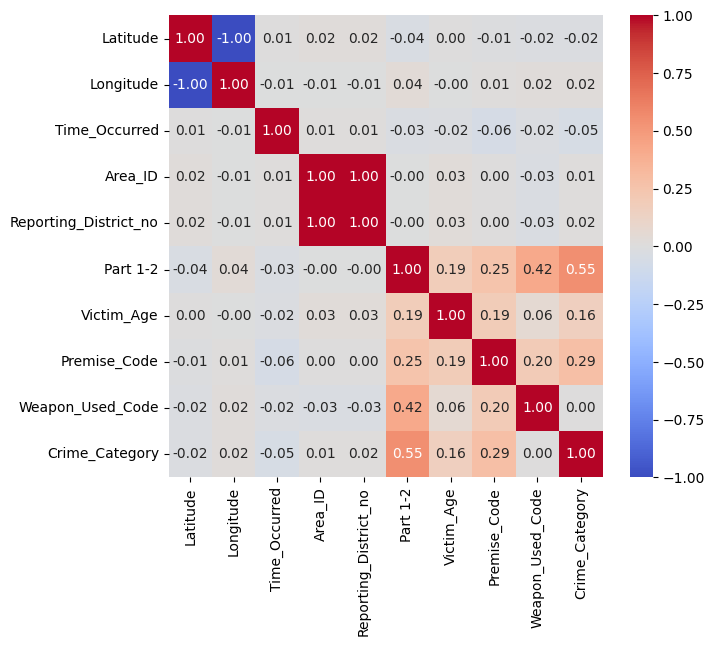

In [11]:
temp_train = train.copy()
temp_train['Crime_Category'], uniques = pd.factorize(temp_train['Crime_Category']) 
correlation_matrix = temp_train.corr(numeric_only=True)

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Here we can see that `Area_ID` and `Reporting_District_no` exhibit perfect correlation. We can drop one of these columns.
`Part 1-2` column seems to be important because it shows moderately high correlation with the target variable.

<Axes: xlabel='Latitude', ylabel='Longitude'>

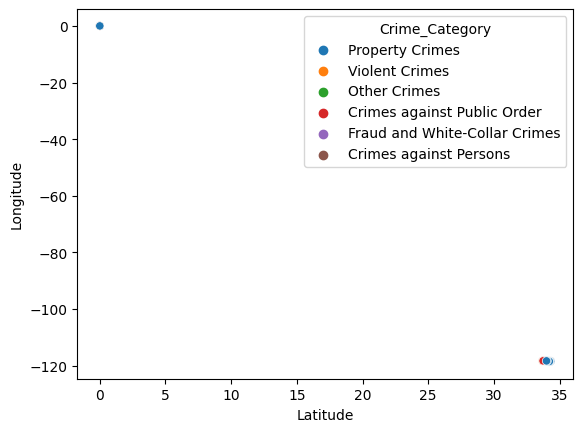

In [12]:
sns.scatterplot(data=train, x='Latitude', y='Longitude', hue='Crime_Category')

The latitudes/longitudes of all crimes are within a specific region only.

In [13]:
crosstabulation = pd.crosstab(index=target_var_train, columns=train['Status_Description'])

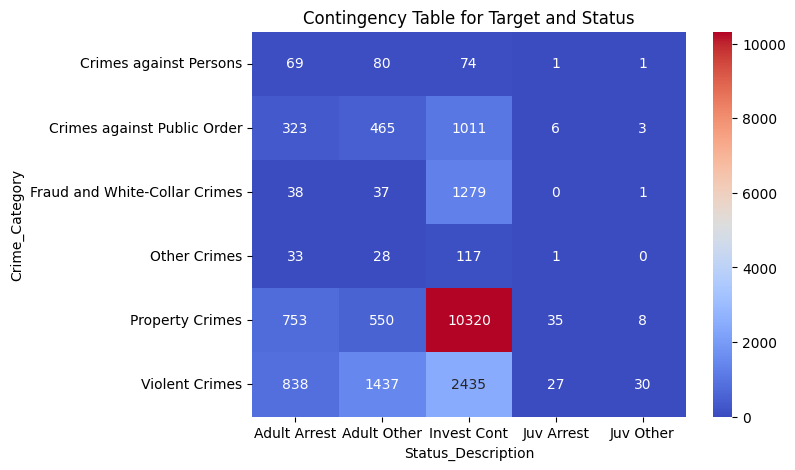

In [14]:
plt.figure(figsize=(7, 5))
sns.heatmap(data=crosstabulation, vmin=0, cmap='coolwarm', annot=True, fmt='n')
plt.title("Contingency Table for Target and Status")
plt.show()

The category `Property Crimes` shows the highest frequency, particularly in the `Adult Arrest` and `Invest Cont` (this status code most probably means "Investigation Continuing") statuses.

For categorical features, we cannot draw appropriate/valid conclusion based on correlation analysis (after encoding the labels). It's better to use techniques like Chi-square Test for Independence of categorical variables.

Cramér's V uses Chi-square test to tell us the strength of the association between categorical variables. 

In [15]:
from scipy.stats import chi2_contingency
cat_df = train[['Victim_Sex', 'Victim_Descent','Area_Name','Status', 'Crime_Category']]

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1))) # this is the Cramer's V value between 0 and 1

# Calculate the Cramér's V matrix
categorical_columns = cat_df.columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(cat_df[col1], cat_df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

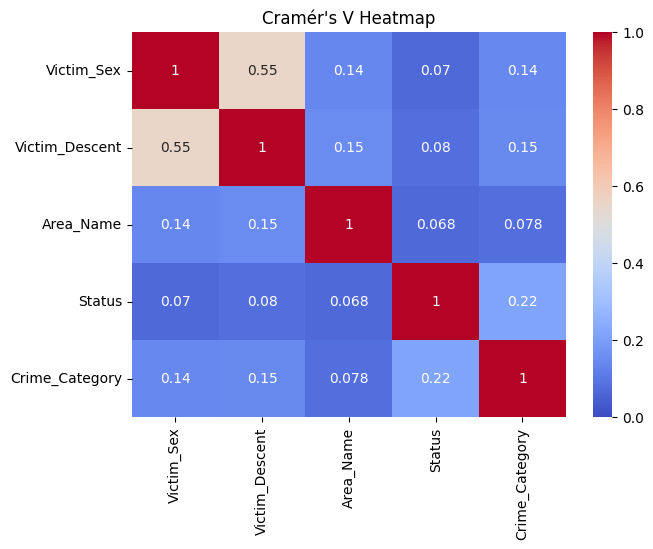

In [16]:
# Plotting the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()

`Victim_Sex` and `Victim_Descent` seem to be moderately associated (based on Cramer's V value, which in turn is calculated based on the Chi-square Test for Independence).

**NOTE**: Chi-square Test of Independence tells us whether there is an association between two variables, whereas Cramér's V tells us how strong that association is.

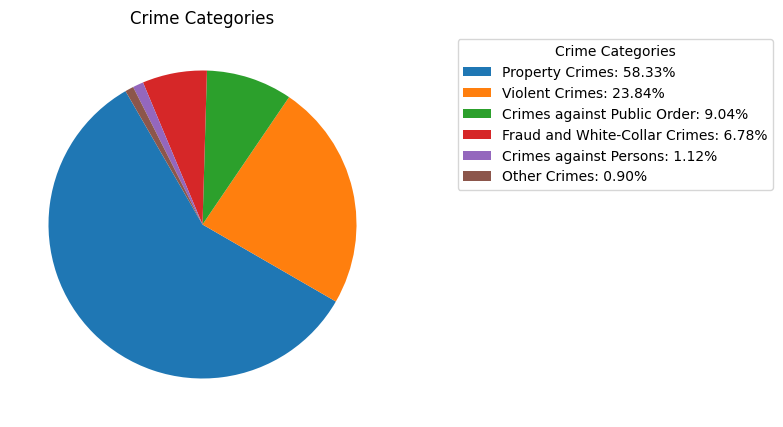

In [17]:
# Target variable's EDA
target = pd.Series(train['Crime_Category'])
target_value_counts = target.value_counts()

labels = target_value_counts.index
sizes = target_value_counts.values

# Creating the plot
plt.figure(figsize=(5, 5))
plt.title("Crime Categories")
wedges, texts = plt.pie(sizes, startangle=120)

# Calculate percentages for the legend
total = sizes.sum()
legend_labels = [f'{label}: {size/total*100:.2f}%' for label, size in zip(labels, sizes)]

# Create a legend with percentages
plt.legend(wedges, legend_labels, title="Crime Categories", loc="upper right", bbox_to_anchor=(2, 1))
plt.show() 

We can see that "Property Crimes" is the most frequent class-label, with nearly 60% of the datapoints.
The imbalance in this dataset can be handled using SMOTE (synthetic minority oversampling technique) or using `class_weight` and related parameters.

### Insights from EDA:
1. There are too many missing/null values in `Cross_Street` column, hence it should be dropped.
2. Some columns (like `Area_ID` and `Area_Code`) essentially convey the same information, hence the duplicate column should be dropped.
3. In `Time_Occurred`, the values are not really numeric - information like hours and minutes needs to be extracted from this.
4. `Area_ID` and `Reporting_District_no` exhibit perfect correlation. We can drop one of these columns.
5. Most victims are aged between 20-40 years.
6. `Part 1-2` column seems to be important because it shows moderately high correlation with the target variable.
7. The category `Property Crimes` shows the highest frequency, particularly in the `Adult Arrest` and `Invest Cont` (this status code most probably means "Investigation Continuing") statuses.
8. The above point is also reflected in the Pie Chart of Crime Categories, where we can see that the target variable is quite imbalanced.

# Train-Test Split

**NOTE**: Train-test split is not really necessary for Kaggle competitions like this, because we can always use `cross_val_score()` with 3 to 5 folds of cross validation. 

However, `cross_val_score()` can only be used on preprocessed data. Some strategies like `mean` in `SimpleImputer` consider the entire training data to impute missing values, and if we perform cross validation on this imputed data, some information will leak from the testing split into the training split. 

For practical purposes, it is always better to do `train_test_split` first and *then* apply preprocessing steps.

In [18]:
from sklearn.model_selection import train_test_split

train = train.drop(columns=["Crime_Category"])

X, y = train.copy(), target_var_train.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=37, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(train.shape, test.shape, target_var_train.shape)
print(X_train.columns.tolist() == train.columns.tolist())
# IMPORTANT!!!
# Before building models to check performance, re-check if: 
# 1. Textual features and Modus_Operandi column are transformed for these split datasets, and
# 2. `preprocessor` pipeline is used on these split datasets.

(16000, 21) (4000, 21) (16000,) (4000,)
(20000, 21) (5000, 21) (20000,)
True


# Data Preprocessing

In [19]:
from sklearn.pipeline import Pipeline

# For applying preprocessing steps to columns
from sklearn.compose import ColumnTransformer

# For missing/NULL value imputation
from sklearn.impute import SimpleImputer, KNNImputer

# For scaling and encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# For textual features
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# Encoding the Target Variable

crime_cat_list = ['Other Crimes',
                  'Violent Crimes',
                  'Crimes against Persons',
                  'Property Crimes',
                  'Fraud and White-Collar Crimes',
                  'Crimes against Public Order']

y_encoder = LabelEncoder()
y_encoder.fit(crime_cat_list)
y_encoded = y_encoder.transform(target_var_train)

y_classes = y_encoder.classes_

In [21]:
# Ensuring that NA values are known/handled before using imputers
def handle_na(data):
    df = data.copy()
    
    na_list = ['Victim_Descent', 'Victim_Sex', 'Weapon_Used_Code', 'Weapon_Description', 'Premise_Description']
    
    df[na_list] = df[na_list].fillna(value='Unknown')
    return df

In [22]:
train, test = handle_na(train), handle_na(test)

In [23]:
# Part of "Feature Engineering"

# converts military time into minutes
def military_24h_time_to_mins(row):
    time = row['Time_Occurred']
    hours, mins = time//100, time%100
    
    time_in_mins = hours * 60 + mins
    
    del hours
    del mins
    del time
    
    return int(time_in_mins)

print("Sucessfully defined `military_24h_time_to_mins()`") # For the purpose of logging only

# applies sine-cosine transformation to represent periodic nature of time
def sine_cosine_transformer(df):
    period = 24 * 60  # 24 hours, 60 minutes per hour
    df['Time_sin'] = np.sin(2 * np.pi * df['Time_Occurred_Mins'] / period)
    df['Time_cos'] = np.cos(2 * np.pi * df['Time_Occurred_Mins'] / period)


print("Sucessfully defined `sine_cosine_transformer()`")

Sucessfully defined `military_24h_time_to_mins()`
Sucessfully defined `sine_cosine_transformer()`


### Feature Engineering for Date Columns

In [24]:
# Part of "Feature Engineering"
def extract_date_features(df):
    
    data = df.copy()
    # Converting date columns to datetime
    data['Date_Reported'] = pd.to_datetime(data['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
    data['Date_Occurred'] = pd.to_datetime(data['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')

    # Extracting features from date columns
    data['Year_Reported'] = data['Date_Reported'].dt.year
    data['Month_Reported'] = (data['Date_Reported'].dt.month).astype('category')
    data['WeekDay_Reported'] = data['Date_Reported'].dt.weekday

    data['Year_Occurred'] = data['Date_Occurred'].dt.year
    data['Month_Occurred'] = (data['Date_Occurred'].dt.month).astype('category')
    data['WeekDay_Occurred'] = data['Date_Occurred'].dt.weekday
    
    # Dropping the original date columns
    #data.drop(columns=['Date_Reported', 'Date_Occurred'], inplace=True)
    date_cols_to_drop = ['Date_Reported', 'Date_Occurred']
    return (data, date_cols_to_drop)

print("Successfully defined `extract_date_features()`")

Successfully defined `extract_date_features()`


In [25]:
 def textual_prep(train_df, test_df):
    # this function uses 'funtion attributes' to stored the original text-features
    # and the columns obtained after TF-IDF vectorization.
        
    # Check if the function attribute exists, if not, initialize it
    if not hasattr(textual_prep, 'tfidf_features_'):
        textual_prep.tfidf_features_ = None
        
    if not hasattr(textual_prep, 'textual_features_'):
        textual_prep.textual_features_ = None

    train_df, test_df = train_df.copy(), test_df.copy() # work with a copy

    # Deal with textual columns
    textual_features = ['Location',
                        'Premise_Description',
                        'Weapon_Description'
                       ]
    
    train_df[textual_features] = train_df[textual_features].replace(to_replace='', value=np.nan)
    test_df[textual_features] = test_df[textual_features].replace(to_replace='', value=np.nan)
    
    # Imputing missing/null values
    impute_text = SimpleImputer(strategy='constant', fill_value='Unknown')
    train_df[textual_features] = impute_text.fit_transform(train_df[textual_features]) #training data
    test_df[textual_features] = impute_text.transform(test_df[textual_features]) #testing data
    
    print(f"Missing values in train:\n{train_df[textual_features].isna().sum()}; \nand test:\n{test_df[textual_features].isna().sum()}")
    
    # Define the vectorizer
    textual_tfidf_transformer = TfidfVectorizer(
            max_df=0.90,  # Ignore terms with a document frequency higher than 90%
            min_df=0.01,  # Ignore terms with a document frequency lower than 1%
            ngram_range=(1, 2),  # Consider unigrams and bigrams
            max_features=100,  # Limit the number of features to 100
            stop_words='english',  # Remove English stop words
            sublinear_tf=True
    )

    tfidf_features = [] #initialize a list to store the output feature-names
    for t in textual_features:
        #for training data, fit first and then transform
        tfidf_matrix_train = textual_tfidf_transformer.fit_transform(train_df[t])
        tfidf_df_train = pd.DataFrame(tfidf_matrix_train.toarray(), 
                                columns=textual_tfidf_transformer.get_feature_names_out())

        #for testing data, just transform based on training-fit
        tfidf_matrix_test = textual_tfidf_transformer.transform(test_df[t])
        tfidf_df_test = pd.DataFrame(tfidf_matrix_test.toarray(), 
                                columns=textual_tfidf_transformer.get_feature_names_out())

        tfidf_features += tfidf_df_train.columns.to_list() #just store the tfidf feature-names for future use

        train_df = pd.concat([train_df, tfidf_df_train], axis=1) #for training data
        test_df = pd.concat([test_df, tfidf_df_test], axis=1) #for testing data 


    if textual_prep.tfidf_features_ is None: # function attribute to store generated colnames
        textual_prep.tfidf_features_ = tfidf_features 
    if textual_prep.textual_features_ is None:
        textual_prep.textual_features_ = textual_features

    return train_df, test_df
print("Successfully defined `textual_prep()`")

Successfully defined `textual_prep()`


In [26]:
train, test = textual_prep(train, test)
tfidf_features = textual_prep.tfidf_features_
print(f"Train shape: {train.shape}, \nTest shape: {test.shape}, \nLength of tfidf_features: {len(tfidf_features)}")

Missing values in train:
Location               0
Premise_Description    0
Weapon_Description     0
dtype: int64; 
and test:
Location               0
Premise_Description    0
Weapon_Description     0
dtype: int64
Train shape: (20000, 121), 
Test shape: (5000, 121), 
Length of tfidf_features: 100


After going through the values in the `Modus_Operandi` column, I observed that:
- each value is of the form `####` where `#` represents a numeral.
- there may be multiple instances of `####` within the same value, separated by a space ` `.

For example (this is from `train['Modus_Operandi'].value_counts()`):
```
Modus_Operandi
0344                                       826
0329                                       583
1501                                       187
0329 1300                                  135
0325                                       127
                                          ... 
1609 0329 1307 0344                          1
0344 2050 0910 2034                          1
0400 2000 0913                               1
1822 0342 0910 2049 2051 0305 0444 0344      1
1202 2038 0913 0602 1242 0553                1
```

To handle this, I decided to use TF-IDF Vectorizer again, but this time considering only unigrams.
For NULL values, I'm imputing with `0000`.

In [27]:
def modus_operandi_prep(train_df=X_train, test_df=X_test):
    
    # Check if the function attribute exists, if not, initialize it
    if not hasattr(modus_operandi_prep, 'MO_tfidf_features_'):
        modus_operandi_prep.MO_tfidf_features_ = None
    
    train_df, test_df = train_df.copy(), test_df.copy()
    
    # Handling Modus_Operandi column
    modus_operandi_tfidf = TfidfVectorizer(
            analyzer='word',
            ngram_range=(1,1), # Consider only unigrams for Modus_Operandi
            #max_features=100,  # I need all possible modus operandi, so no limit
            sublinear_tf=True
    )
    
    # imputing missing values
    MO_impute = SimpleImputer(strategy='constant', fill_value='0000') #fill with 0000
    train_df[['Modus_Operandi']] = MO_impute.fit_transform(train_df[['Modus_Operandi']]) #training data
    test_df[['Modus_Operandi']] = MO_impute.transform(test_df[['Modus_Operandi']]) #testing data

    MO_tfidf_matrix_train = modus_operandi_tfidf.fit_transform(train_df['Modus_Operandi'])
    MO_tfidf_matrix_test = modus_operandi_tfidf.transform(test_df['Modus_Operandi'])

    MO_tfidf_df_train = pd.DataFrame(MO_tfidf_matrix_train.toarray(), 
                                columns=modus_operandi_tfidf.get_feature_names_out())
    MO_tfidf_df_test = pd.DataFrame(MO_tfidf_matrix_test.toarray(), 
                                columns=modus_operandi_tfidf.get_feature_names_out())

    train_df = pd.concat([train_df, MO_tfidf_df_train], axis=1) #for training data
    test_df = pd.concat([test_df, MO_tfidf_df_test], axis=1) #for testing data
    
    
    if modus_operandi_prep.MO_tfidf_features_ is None: # function attribute to store TF-IDF colnames
        modus_operandi_prep.MO_tfidf_features_ = MO_tfidf_df_train.columns.to_list()
    
    
    return (train_df, test_df)

print("Success")

Success


In [28]:
train['Modus_Operandi'].shape

(20000,)

In [29]:
train, test = modus_operandi_prep(train, test)
tfidf_features += modus_operandi_prep.MO_tfidf_features_ # append the Modus_Operandi TF-IDF features
print(f"Train shape: {train.shape}, \nTest shape: {test.shape}, \nLength of tfidf_features: {len(tfidf_features)}")

Train shape: (20000, 603), 
Test shape: (5000, 603), 
Length of tfidf_features: 582


In [30]:
def data_prep(data):
    #function for extracting date & time features, and dropping unnecessary columns
    df = data.copy()
    
    # Making a list of columns to be dropped before any preprocessing
    cols_to_drop = ['Cross_Street', # 16552 NULL values
                    'Weapon_Used_Code', # Using Weapon_Description instead
                    'Status_Description', # Only 5 unique values; Using Status instead
                    'Area_ID', # Only 21 unique values; Using Area_Name instead
                    'Modus_Operandi' # IMPORTANT: assumed that it's been dealt with after text-features!!
                   ]
    textual_features = textual_prep.textual_features_ # Use of function attributes :)
    cols_to_drop += textual_features # Since textual columns have already been preprocessed
    
    # IMPORTANT: Make sure textual features have been handled BEFORE adding them to `cols_to_drop`.
    
    # deal with 'Time_Occurred' column
    df['Time_Occurred_Mins'] = df.apply(military_24h_time_to_mins, axis=1)
    sine_cosine_transformer(df)
    cols_to_drop += ['Time_Occurred','Time_Occurred_Mins']
    
    # extract (day, month, year) and append new columns
    df, date_cols_to_drop = extract_date_features(df)
    cols_to_drop += date_cols_to_drop
    
    # drop unnecessary and redundant columns
    df = df.drop(columns=cols_to_drop)
    
    try:
        df = df.drop(columns=['Crime_Category'])
        cols_to_drop += ['Crime_Category']
    except:
        print(f'Crime_Category already dropped, or trying to drop for a testing dataframe!!')
    
    # the list of dropped columns' names can be accessed later as an attribute
    data_prep.cols_to_drop_ = cols_to_drop
    
    return df

`Is_Arrested` and `Is_Weapon_Used` were the two columns I engineered (after taking inspiration from Sumana Ghosh Roy's public notebook), and they improved my Kaggle score!

In [31]:
# Inspiration from Sumana Ghosh Roy's public notebook
# Part of "Feature Engineering"
train['Is_Arrested'] = train['Status'].apply(lambda status: 1 if status in ['AA', 'JA'] else 0)
test['Is_Arrested'] = test['Status'].apply(lambda status: 1 if status in ['AA', 'JA'] else 0)

In [32]:
train['Is_Arrested'].isna().sum(), test['Is_Arrested'].isna().sum()

(0, 0)

In [33]:
# Part of "Feature Engineering"
train['Is_Weapon_Used'] = train['Weapon_Used_Code'].apply(lambda weapon: 1 if ((weapon is not np.nan) and weapon != 'Unknown')   else 0)
test['Is_Weapon_Used'] = test['Weapon_Used_Code'].apply(lambda weapon: 1 if ((weapon is not np.nan) and weapon != 'Unknown')   else 0)

In [34]:
train = data_prep(train)
print(f"\nColumns dropped after prepping train data:\n{data_prep.cols_to_drop_}")

print("----"*25, end='\n\n')

test = data_prep(test)
print(f"\nColumns dropped after prepping test data:\n{data_prep.cols_to_drop_}")

print(f"\nTrain shape: {train.shape}, \nTest shape: {test.shape}")

Crime_Category already dropped, or trying to drop for a testing dataframe!!

Columns dropped after prepping train data:
['Cross_Street', 'Weapon_Used_Code', 'Status_Description', 'Area_ID', 'Modus_Operandi', 'Location', 'Premise_Description', 'Weapon_Description', 'Time_Occurred', 'Time_Occurred_Mins', 'Date_Reported', 'Date_Occurred']
----------------------------------------------------------------------------------------------------

Crime_Category already dropped, or trying to drop for a testing dataframe!!

Columns dropped after prepping test data:
['Cross_Street', 'Weapon_Used_Code', 'Status_Description', 'Area_ID', 'Modus_Operandi', 'Location', 'Premise_Description', 'Weapon_Description', 'Time_Occurred', 'Time_Occurred_Mins', 'Date_Reported', 'Date_Occurred']

Train shape: (20000, 602), 
Test shape: (5000, 602)


In [35]:
# Define preprocessing for categorical features
categorical_features = ['Victim_Sex', 
                        #'Victim_Descent', #see ordinal features below
                        'Status', 
                        #'Month_Occurred', #see ordinal features below
                        'Area_Name','Part 1-2','Premise_Code']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    #('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode
    ('ordinal_expt', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # experimenting with another encoding technique
])


# ----------------------------------------------------------------------------------------------------------------------------------------------------#


ordinal_features = ['Month_Occurred', 'Victim_Descent']

month_nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# I assumed that all 26 letters are used as categories in the Victim_Descent column
alphabets_caps = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Unknown']

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[month_nums, alphabets_caps], handle_unknown='use_encoded_value', unknown_value=-1))
])

I'm using `RobustScaler()` to nullify the effect of outliers, as it uses statistics that are robust to outliers. Source: [StandardScaler, MinMaxScaler and RobustScaler techniques – ML](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/)

In [36]:
# Define preprocessing pipeline for numerical features
numerical_features = ['Latitude', 
                      'Longitude',
                      'Reporting_District_no',
                      'Victim_Age', 
                      'Time_sin', 
                      'Time_cos', 
                      'Year_Occurred']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
    ('scaler', RobustScaler()),  # Scale features
    #('scaler', MinMaxScaler()),
    #('scaler', StandardScaler()),
    #('scaler', RobustScaler(unit_variance=True)),
])

In [37]:
# Combine preprocessing steps

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        #('text', textual_transformer, textual_features)
    ],
    remainder='passthrough', # do not drop the remaining columns, they're important!
    verbose=True, # for better troubleshooting while going through the logs
    verbose_feature_names_out=True
    # If True, ColumnTransformer.get_feature_names_out 
    # will prefix all feature names with the name of 
    # the transformer that generated that feature.
)

In [38]:
# Applying the preprocessing steps

preprocessor.fit(train) 

X_TRAIN = preprocessor.transform(train)
    
X_TEST = preprocessor.transform(test)

print(f"X_TRAIN shape: {X_TRAIN.shape}")
print(f"X_TEST shape: {X_TEST.shape}")

[ColumnTransformer] ........... (1 of 4) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 4) Processing cat, total=   0.1s
[ColumnTransformer] ........... (3 of 4) Processing ord, total=   0.0s
[ColumnTransformer] ..... (4 of 4) Processing remainder, total=   0.0s
X_TRAIN shape: (20000, 608)
X_TEST shape: (5000, 608)


In [39]:
preprocessor.output_indices_ # useful to inspect which transformer is responsible for which transformed feature(s).

{'num': slice(0, 7, None),
 'cat': slice(7, 12, None),
 'ord': slice(12, 14, None),
 'remainder': slice(14, 602, None)}

In [40]:
# prep_features = preprocessor.get_feature_names_out()
# print(len(prep_features))
# print(prep_features)

In [41]:
X_TRAIN.shape, target_var_train.shape

((20000, 608), (20000,))

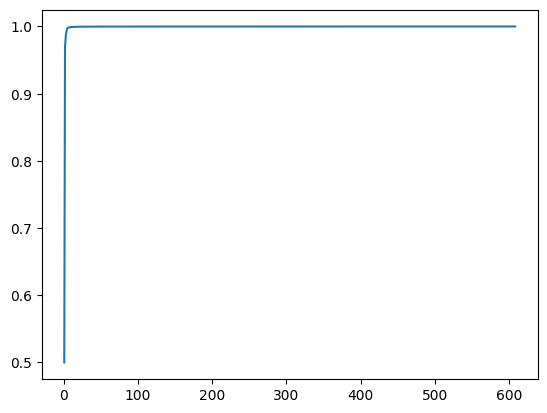

In [42]:
# Using Principal Component Analysis to check how many features explain maximum variance of the data
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_TRAIN, y_encoded)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)

We don't need so many features! The variance is being explained by less than 100 features!

# Model Building

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [44]:
# Helper functions
def print_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

def add_performance_to_dict(perf_dict, model_name, y_true, y_pred, y_prob):
    if model_name not in perf_dict:
        perf_dict[model_name] = {
            'classification_report': classification_report(y_true, y_pred, target_names=y_classes, output_dict=True),
            'roc_auc': roc_auc_score(label_binarize(y_true, classes=list(range(y_prob.shape[1]))), y_prob, average='weighted', multi_class='ovr')
        }
        print(f"\n{model_name} added to performance dictionary!\n")
    else:
        print(f"\n{model_name} already exists!\n")
        

performance_dict = dict()

In [45]:
# set random seed
random_seed = 37 # it's a nice prime number :)

I'm using StratifiedKFold to ensure that the results of cross-validation are reproducible. It's better than simply assigning an integer to the `cv` parameter.

In [46]:
stratified_cv = StratifiedKFold(n_splits=5, random_state=random_seed, shuffle=True)

In [47]:
# X_train, X_test = textual_prep(X_train, X_test)
# X_train, X_test = modus_operandi_prep(X_train, X_test)
# X_train, X_test = data_prep(X_train, X_test)

# model = Pipeline([
#         ("preprocessor", preprocessor),
#         ('pca', PCA(n_features=25)),
#         ('rf', RandomForestClassifier())
# ])

# model.fit(X_train, y_train)
# out_train = model.predict(X_train)
# out_test = model.predict(X_test)

# print_performance(y_train, out_train)
# print_performance(y_test, out_test)

# First Submission
Using `DummyClassifier` from `sklearn.dummy`, I made the first submission with Kaggle score of **`0.58660`**.
```python
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X,y)
dummy_output = dummy.predict(test)
```
The code cell below has been commented out.

In [48]:
# from sklearn.dummy import DummyClassifier
# dummy = DummyClassifier(strategy='most_frequent')
# dummy.fit(X,y)
# dummy_output = dummy.predict(test)

# Model 1: Logistic Regression

[Baseline Model]
Gave score **`0.64960`** on Kaggle.

**NOTE:** This was a part of my first few notebooks, and hence it is *not up-to-date*.
```python
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(multi_class='multinomial', max_iter=99999)
pipeline_logreg = Pipeline(steps=[('data_prep',preprocessor), ('logreg_model', logreg_model)])
pipeline_logreg.fit(X1_train, y1_train)
logreg_pred_val = pipeline_logreg.predict(X1_val)
print(classification_report(y1_val, logreg_pred_val))
print(confusion_matrix(y1_val, logreg_pred_val))
```

In [49]:
# logreg_clf = LogisticRegression(multi_class='multinomial', max_iter=99999)
# logreg_model = Pipeline([
#         ('pca', PCA(n_components=100, random_state=random_seed)),
#         ('logreg_clf', logreg_clf)
# ])

# logreg_model.fit(X_TRAIN, y_encoded)
# logreg_output = logreg_model.predict(X_TRAIN)
# logreg_prob = logreg_model.predict_proba(X_TRAIN)

# add_performance_to_dict(performance_dict, 
#                         'Logistic Regression', 
#                         y_encoded, 
#                         logreg_output, 
#                         logreg_prob)

In [50]:
#cross_val_score(logreg_clf, X_TRAIN, y_encoded, cv=stratified_cv, n_jobs=-1)

# Model 2: Gradient Boosting

Cross-validation:
```python
from sklearn.model_selection import cross_val_score

cross_val_score(GradientBoostingClassifier(), X_TRAIN, target_var_train, cv=stratified_cv, n_jobs=-1)
```
Output:
```
array([0.948  , 0.9495 , 0.94475, 0.95425, 0.9485 ])
```

In [51]:
# gb_clf = GradientBoostingClassifier(n_estimators=200,
#                                 min_samples_split=2,
#                                 max_depth=4,
#                                 random_state=random_seed, 
#                                 max_features='sqrt', 
#                                 verbose=True,)
# gb_clf.fit(X_TRAIN, y_encoded)
# gb_output = gb_clf.predict(X_TRAIN)
# gb_prob = gb_clf.predict_proba(X_TRAIN)

# add_performance_to_dict(performance_dict, 
#                         'Gradient Boosting', 
#                         y_encoded, 
#                         gb_output, 
#                         gb_prob)

The output of the above commented code is:
```
      Iter       Train Loss   Remaining Time 
         1           1.0362           58.44s
         2           0.9264           57.75s
         3           0.8354           53.89s
         4           0.7794           51.25s
         5           0.7345           49.50s
         6           0.6907           48.25s
         7           0.6582           47.52s
         8           0.6292           46.75s
         9           0.6032           45.92s
        10           0.5760           45.28s
        20           0.4154           41.23s
        30           0.3270           40.06s
        40           0.2692           37.16s
        50           0.2315           34.40s
        60           0.2009           31.88s
        70           0.1791           29.45s
        80           0.1631           27.09s
        90           0.1469           24.75s
       100           0.1369           22.42s
       200           0.0816            0.00s

Gradient Boosting added to performance dictionary!
```

# Model 3: Decision Tree

Default classifier:
```python
dt_clf = DecisionTreeClassifier()
cross_val_score(dt_clf, X_TRAIN, target_var_train, cv=5, n_jobs=-1)
```

OUTPUT:
```
array([0.934  , 0.93025, 0.92975, 0.93775, 0.927  ])
```

In [52]:
# dt_clf = DecisionTreeClassifier(random_state=random_seed)
# dt_clf.fit(X_TRAIN, y_encoded)
# dt_output = dt_clf.predict(X_TRAIN)
# dt_prob = dt_clf.predict_proba(X_TRAIN)

# add_performance_to_dict(performance_dict, 
#                         'Decision Tree', 
#                         y_encoded, 
#                         dt_output, 
#                         dt_prob)
# # cross_val_score(dt_clf, X_TRAIN, target_var_train, cv=stratified_cv, n_jobs=-1)

# Model 4: Random Forest

Cross-validation:
```python
cross_val_score(RandomForestClassifier(), X_TRAIN, target_var_train, cv=stratified_cv, n_jobs=-1)
```

OUTPUT:
```
array([0.9415 , 0.94275, 0.94025, 0.94075, 0.94375])
```

In [53]:
# rf_clf = RandomForestClassifier(random_state=random_seed)
# rf_clf.fit(X_TRAIN, y_encoded)
# rf_output = rf_clf.predict(X_TRAIN)
# rf_prob = rf_clf.predict_proba(X_TRAIN)

# add_performance_to_dict(performance_dict, 
#                         'Random Forest', 
#                         y_encoded, 
#                         rf_output, 
#                         rf_prob)

# # cross_val_score(RandomForestClassifier(), X_TRAIN, target_var_train, cv=stratified_cv, n_jobs=-1)

<hr>

# Hyperparameter Tuning

For `GradientBoostingClassifier`, training time was very long, so hyperparameter tuning using a grid of parameters was extremely time-consuming. I decided to go with XGBoost and LightGBM (which are faster and optimized implementations) instead.

In [54]:
# param_dist_gb = {
#     'n_estimators': [100, 150, 200, 250],  # Number of boosting stages
#     'max_depth': [3, 4, 9],  # Maximum depth of the individual estimators
#     'min_samples_split': [2, 10, 15],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 5, 10],  # Minimum number of samples required to be at a leaf node
# }

In [55]:
# gb = GradientBoostingClassifier(n_estimators=250,
#                                 min_samples_split=2,
#                                 max_depth=4,
#                                 random_state=random_seed, 
#                                 max_features='sqrt', 
#                                 verbose=True,)

In [56]:
# random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(max_features='sqrt'), 
#                                       param_distributions=param_dist_gb, 
#                                       n_iter=2, 
#                                       cv=2, 
#                                       verbose=2, 
#                                       n_jobs=-1, 
#                                       random_state=random_seed)
# random_search_gb.fit(X_TRAIN, y_encoded)
# best_clf = random_search_gb.best_estimator_
# best_clf

In [57]:
# Define parameter distributions for Random Forest
param_dist_rf = {
    'n_estimators': [10, 50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],  # Minimum number of samples required to be at a leaf node
}

# Define parameter distributions for Decision Tree
param_dist_dt = {
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]  # Minimum number of samples required to be at a leaf node
}

# # Random Forest model
# rf = RandomForestClassifier(random_state=random_seed)

# # Decision Tree model
# dt = DecisionTreeClassifier(random_state=random_seed)

HPT for Random Forest and Decision Tree

In [58]:
# # Randomized search with 3-fold cross-validation for Random Forest
# random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=random_seed)
# random_search_rf.fit(X_TRAIN, y_encoded)

# # Randomized search with 3-fold cross-validation for Decision Tree
# random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=random_seed)
# random_search_dt.fit(X_TRAIN, y_encoded)

# best_rf = random_search_rf.best_estimator_
# best_dt = random_search_dt.best_estimator_

# # See cross-validation score to obtain the best among these two
# rf_score = cross_val_score(best_rf, X_TRAIN, target_var_train, cv=3)
# dt_score = cross_val_score(best_dt, X_TRAIN, target_var_train, cv=3)
# print(f"For random forest: {rf_score}")
# print(f"For decision tree: {dt_score}")

# best_clf = dt if max(dt_score) > max(rf_score) else rf

## Trying XGBoost and LightGBM.

In [59]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(verbosity=2, 
                        eval_metric='mlogloss', 
                        subsample=0.75, 
                        reg_lambda=0.1, 
                        reg_alpha=0.1, 
                        n_estimators=150, 
                        max_depth=5) 
# This is the loss function used in (multinomial) logistic regression 
# and extensions of it such as neural networks, defined as the 
# negative log-likelihood of a logistic model.

xgb_clf.fit(X_TRAIN, y_encoded)
xgb_output = xgb_clf.predict(X_TRAIN)
xgb_prob = xgb_clf.predict_proba(X_TRAIN)

add_performance_to_dict(performance_dict, 
                        'XGBoost', 
                        y_encoded, 
                        xgb_output, 
                        xgb_prob)


XGBoost added to performance dictionary!



In [60]:
y_train_pred_xgb = xgb_clf.predict(X_TRAIN)
print(classification_report(y_encoded, y_train_pred_xgb, target_names=y_classes))

                               precision    recall  f1-score   support

       Crimes against Persons       1.00      1.00      1.00       225
  Crimes against Public Order       1.00      1.00      1.00      1808
Fraud and White-Collar Crimes       1.00      1.00      1.00      1355
                 Other Crimes       1.00      1.00      1.00       179
              Property Crimes       1.00      1.00      1.00     11666
               Violent Crimes       1.00      1.00      1.00      4767

                     accuracy                           1.00     20000
                    macro avg       1.00      1.00      1.00     20000
                 weighted avg       1.00      1.00      1.00     20000



#### Tuning the Hyperparameters of XGBoost Classifier

In [61]:
# xgb_param_dist = {'n_estimators': [50, 150],
#                   'max_depth': [3, 5, 7],                # Maximum tree depth (to control overfitting)
#                   'learning_rate': [0.01, 0.1, 0.2],
#                   'subsample': [0.7, 0.9],               # Subsample ratio of the training instance
#                   'colsample_bytree': [0.7, 0.9],        # Subsample ratio of columns when constructing each tree 
#                   'gamma': [0, 0.1, 0.5],                # Minimum loss reduction required to make a further partition
#                   'reg_alpha': [0.01, 0.1, 1.0],         # L1 regularization term on weights
#                   'reg_lambda': [0.01, 0.1, 1.0]         # L2 regularization term on weight
# }

# random_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=xgb_param_dist, 
#                                    n_iter=5, cv=stratified_cv, scoring='accuracy', 
#                                    n_jobs=-1, random_state=random_seed)

# random_search_xgb.fit(X_TRAIN, y_encoded)

Printing the best parameters and score.
```python
# Best parameters found
print("Best parameters found: ", random_search_xgb.best_params_)

print()

# Best score achieved
print("Best accuracy score: ", random_search_xgb.best_score_)
```

OUTPUT:
```
Best parameters found:  {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.9}

Best accuracy score:  0.9566000000000001
```

Cross-Validation:
```python
cross_val_score(best_clf, X_TRAIN, y_encoded, cv=stratified_cv)
```

OUTPUT:
```
array([0.95825, 0.94925, 0.95375, 0.958  , 0.955  ])
```


In [62]:
# # Best parameters found
# print("Best parameters found: ", random_search_xgb.best_params_)

# print()

# # Best score achieved
# print("Best accuracy score: ", random_search_xgb.best_score_)

In [63]:
# best_xgb_params = {'eval_metric':'mlogloss',
#                    'subsample': 0.9, 
#                    'reg_lambda': 0.1, 
#                    'reg_alpha': 0.1, 
#                    'n_estimators': 150, 
#                    'max_depth': 7, 
#                    'learning_rate': 0.2, 
#                    'gamma': 0.5, 
#                    'colsample_bytree': 0.9}
# xgb_clf = XGBClassifier(**best_xgb_params)

# # Gave a Kaggle score of 0.92760
# # Not the best score, so HPT is not helping much.

<hr>

In [64]:
import lightgbm as lgb

best_params = {'learning_rate': 0.1, 'n_estimators': 150, 'num_leaves': 31, 'verbose': -1, 'max_depth':4}
lgb_clf = lgb.LGBMClassifier(**best_params)
lgb_clf.fit(X_TRAIN, y_encoded)

y_train_pred_lgb = lgb_clf.predict(X_TRAIN)

lgb_output = y_train_pred_lgb
lgb_prob = lgb_clf.predict_proba(X_TRAIN)

add_performance_to_dict(performance_dict, 
                        'LightGBM', 
                        y_encoded, 
                        lgb_output, 
                        lgb_prob)

print(classification_report(y_encoded, y_train_pred_lgb, target_names=y_classes))


LightGBM added to performance dictionary!

                               precision    recall  f1-score   support

       Crimes against Persons       1.00      0.97      0.98       225
  Crimes against Public Order       0.93      0.94      0.93      1808
Fraud and White-Collar Crimes       0.98      0.97      0.98      1355
                 Other Crimes       0.92      0.75      0.82       179
              Property Crimes       1.00      0.99      0.99     11666
               Violent Crimes       0.97      0.99      0.98      4767

                     accuracy                           0.98     20000
                    macro avg       0.96      0.93      0.95     20000
                 weighted avg       0.98      0.98      0.98     20000



Trying LightGBM:
```python
import lightgbm as lgb

best_params = {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31, 'verbose': -1}
lgb_clf = lgb.LGBMClassifier(**best_params)
lgb_clf.fit(X_TRAIN, target_var_train)

y_train_pred_lgb = lgb_clf.predict(X_TRAIN)
print(classification_report(target_var_train, y_train_pred_lgb, target_names=y_classes))
```

OUTPUT: (chances of overfitting, but hidden test data gave score of **0.92160**, version-42 of final notebook)
```
                               precision    recall  f1-score   support

       Crimes against Persons       1.00      0.97      0.98       225
  Crimes against Public Order       0.93      0.94      0.93      1808
Fraud and White-Collar Crimes       0.98      0.97      0.98      1355
                 Other Crimes       0.92      0.75      0.82       179
              Property Crimes       1.00      0.99      0.99     11666
               Violent Crimes       0.97      0.99      0.98      4767

                     accuracy                           0.98     20000
                    macro avg       0.96      0.93      0.95     20000
                 weighted avg       0.98      0.98      0.98     20000
```

Cross-Validation:
```python
cross_val_score(lgb_clf, X_TRAIN, target_var_train, cv=stratified_cv)
```

OUTPUT:
```
array([0.9585 , 0.9555 , 0.95775, 0.957  , 0.95425])
```

###### NOTE:
In contrast to the level-wise (horizontal) growth in XGBoost, LightGBM carries out leaf-wise (vertical) growth that results in more loss reduction and in turn higher accuracy while being faster. But this may also result in overfitting on the training data which could be handled using the max-depth parameter that specifies where the splitting would occur. Hence, XGBoost is capable of building more robust models than LightGBM. [(Source)](https://neptune.ai/blog/xgboost-vs-lightgbm#:~:text=In%20contrast%20to,models%20than%20LightGBM.)

# Choosing the Best Classifier

In [65]:
# This is just a dictionary of cross-validation accuracy scored that I created manually.
# Ideally we should compare precision, recall, f1_score of minority-classes to trully
# assess the performance of a model on an imbalanced dataset.

clfs_dict = {'Logistic Regression': 0.6496,
             'Decision Tree': 0.9377, 
             'Random Forest': 0.9437, 
             'XGBoost': 0.9582,
             'LightGBM': 0.9216}
clfs_df = pd.DataFrame()
clfs_df['Model'] = clfs_dict.keys()
clfs_df['Accuracy'] = clfs_dict.values()
clfs_df

,Model,Accuracy
0,Logistic Regression,0.6496
1,Decision Tree,0.9377
2,Random Forest,0.9437
3,XGBoost,0.9582
4,LightGBM,0.9216


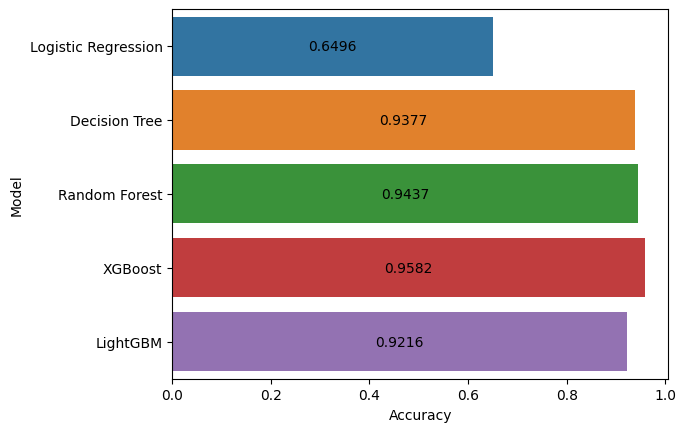

In [66]:
ax = sns.barplot(data=clfs_df, x='Accuracy', y='Model')
ax.bar_label(ax.containers[0], fontsize=10, label_type='center')
plt.show()

Based on the cross-validation accuracy score, I'm choosing **XGBoost** for my final submission.

In [67]:
#best_clf = gb # sklearn's GradientBoostingClassifier
#best_clf = lgb_clf # Light GBM
best_clf = xgb_clf # XGBoost

model = Pipeline([
        ('pca', PCA(n_components=100, random_state=random_seed)), # for reducing the dimensions
        ('best_clf', best_clf)
])

model.fit(X_TRAIN, y_encoded)

output = model.predict(X_TEST)

In [68]:
# Creating the submission file
try:
    submission = pd.DataFrame(columns=['ID','Crime_Category'])
    submission['ID'] = [i+1 for i in range(len(output))]
    
    submission["Crime_Category"] = y_encoder.inverse_transform(output)
    
    submission.to_csv('/kaggle/working/submission.csv', index=False)
    print(f"Shape of the submission dataframe: {submission.shape}")
    print(submission.head())
except:
    print("Output predictions have not been generated and/or assigned to the variable `output`.")

Shape of the submission dataframe: (5000, 2)
   ID                 Crime_Category
0   1                 Violent Crimes
1   2                Property Crimes
2   3  Fraud and White-Collar Crimes
3   4                Property Crimes
4   5    Crimes against Public Order


### Storing the Performance Metrics
Below code is only for storing the dictionary of the performance of each model (even the commented out ones), which can be accessed later to compare. So, the code after this can be completely ignored.

You can find the json file in the "Output" tab.

In [69]:
import os
import json

# Specify the file path
performance_file = '/kaggle/working/performance_dictionary.json'

# Check if the file already exists
if not os.path.exists(performance_file):    
    # Save the performance_dict to a text file
    with open(performance_file, 'w') as file:
        json.dump(performance_dict, file)
    print(f"\nPerformance dictionary saved to {performance_file}!\n")
else:
    print(f"\nPerformance dictionary already exists at {performance_file}. Loading from file...\n")
    # Load the performance_dict from the file
    with open(performance_file, 'r') as file:
        performance_dict = json.load(file)


Performance dictionary saved to /kaggle/working/performance_dictionary.json!



In [70]:
# Check if the file already exists
if os.path.exists(performance_file):
    # Load the performance_dict from the file
    with open(performance_file,) as file:
        performance_dict = json.load(file)
    print(f"\nPerformance dictionary loaded from {performance_file}!\n")
else:
    print(f"\nPerformance dictionary not found. Please run all models first to generate it.\n")
    #performance_dict = {}


Performance dictionary loaded from /kaggle/working/performance_dictionary.json!



In [71]:
# print("ROC-AUC Scores")
# print('-'*20)
roc_auc_dict = {}
for key in performance_dict:
    roc_auc_dict[key] = performance_dict[key]['roc_auc']
#     #print(f"{key}: {performance_dict[key]['roc_auc']:.4f}")
# #performance_dict

roc_auc_df = pd.DataFrame()
roc_auc_df['Model'] = roc_auc_dict.keys()
roc_auc_df['ROC-AUC'] = roc_auc_dict.values()
roc_auc_df

,Model,ROC-AUC
0,XGBoost,1.000000
1,LightGBM,0.999531


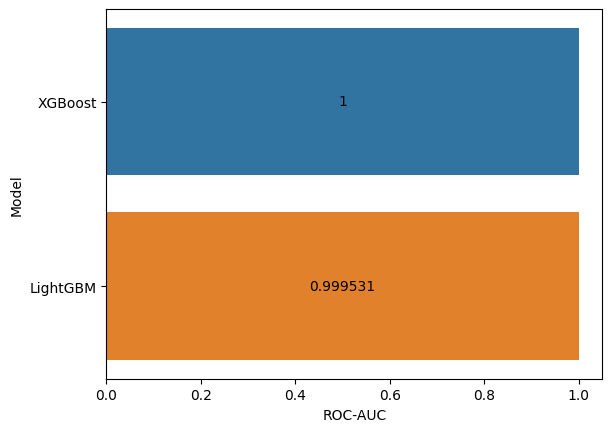

In [72]:
ax = sns.barplot(data=roc_auc_df, x='ROC-AUC', y='Model')
ax.bar_label(ax.containers[0], fontsize=10, label_type='center')
plt.show()